In [1]:
# 导入所有需要的library和package

import pandas as pd 
import numpy as np
import math 
import seaborn as sns 
import xgboost as xgb

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
from mpl_toolkits.mplot3d import Axes3D

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

plt.style.use('_mpl-gallery')
mpl.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
mpl.rcParams['axes.unicode_minus']= False       #显示负号


<font color = blue>*数据预处理：*<font/>

    首先，将数据导入到适合的机器学习库中（如Python的pandas库），并对数据进行清理和预处理。这包括处理缺失值、异常值、重复值等。

<font color = blue>*可视化分析：*<font/>

    使用数据可视化工具（如matplotlib或seaborn）绘制图表，以探索各个变量与库龄之间的关系。可以绘制散点图、箱线图、相关性矩阵等，以了解各个变量之间的关联性。

<font color = blue>*特征工程：*<font/>

    根据对数据的理解和可视化分析的结果，进行特征工程，即从原始数据中提取有用的特征。可以考虑使用数值型特征（如在库库存、总体积、货值）和分类型特征（如仓库、货型、业务线等）。


<font color = blue>*模型选择和训练：*<font/>

    根据问题类型和数据特点，选择适当的机器学习模型进行训练。对于预测库龄的问题，你可以尝试使用回归算法，如线性回归、决策树回归、随机森林回归等。


<font color = blue>*特征选择：*<font/>

    根据模型训练的结果和特征的重要性，进行特征选择，排除不相关的特征，以提高模型的准确性和泛化能力。


<font color = blue>*模型评估和优化：*<font/>

    使用交叉验证等方法对模型进行评估，并对模型进行调参和优化，以达到更好的性能。


<font color = blue>*应用预测：*<font/>

    使用优化后的模型对新数据进行预测，通过输入其他变量的数值，预测出对应的库龄。


In [2]:
# 从总表中导入"三方仓明细汇总" 工作表

df_三方仓明细汇总 = pd.read_excel("自有仓及三方仓库存库龄数据-2023年6月 (1).xlsx","三方仓明细汇总")

df_SKU信息 = pd.read_excel("自有仓及三方仓库存库龄数据-2023年6月 (1).xlsx","SKU信息")

In [3]:
# 查看所有的列
df_三方仓明细汇总.columns

Index(['仓库', '细分仓', 'SKU编码', 'SKU名称', '在库库存', '库龄(天)', '库龄段', '货型', '辅助',
       '仓租报价 原币/天', '仓储费 原币/天', '币种', 'SKU长', 'SKU宽', 'SKU高', 'SKU重量', '总体积',
       '业务线', '销售部门', '总监', '货值'],
      dtype='object')

In [4]:
# 提取想要的列 
col = ['SKU编码','仓库', '细分仓', '在库库存', '库龄(天)', '库龄段','货型','总体积', '业务线', '货值']

In [5]:
# 提取想要的列 
sku_col = [ 'SKU编码',  '一级品类']

In [6]:
df_SKU信息 = df_SKU信息[sku_col]
df_SKU信息

,SKU编码,一级品类
0,AMB005169_B,家居用品
1,AMB005169_SIL,家居用品
2,AMP005116_1_UK,美容健康
3,AMD005033_M_NEW,汽车、摩托车
4,AMD005064_T,汽车、摩托车
...,...,...
1476,AMD005237_BL,汽车、摩托车
1477,AMD005237_BL,汽车、摩托车
1478,AMB005369_R,家用电器
1479,AMB005369_BL,家用电器


In [7]:
# 重定义表格，只取需要的列
df_三方仓明细汇总 = df_三方仓明细汇总[col]
df_三方仓明细汇总

,SKU编码,仓库,细分仓,在库库存,库龄(天),库龄段,货型,总体积,业务线,货值
0,SVF032975_GO,橙联仓,橙联UK仓,3,561,360天以上,NaN,0.000660,销售中心12部,18.6852
1,SVF032975_B,橙联仓,橙联UK仓,6,561,360天以上,NaN,0.001320,销售中心12部,37.2594
2,AMG005112_M,橙联仓,橙联UK仓,1,522,360天以上,NaN,0.079380,销售中心12部,384.9558
3,SPA000033_9,橙联仓,橙联UK仓,3,497,360天以上,NaN,0.070560,销售中心12部,131.4150
4,SPA000033_10,橙联仓,橙联UK仓,11,494,360天以上,NaN,0.258720,销售中心12部,481.8550
...,...,...,...,...,...,...,...,...,...,...
3159,SPC000042_BR_S,易达波兰仓,易达波兰仓,48,95,91-120天,NaN,7.814016,销售中心13部,24637.1664
3160,AMA005939_BR,易达波兰仓,易达波兰仓,1,11,0-30天,NaN,0.068499,销售中心13部,367.2570
3161,SPC000015_W_P,易达波兰仓,易达波兰仓,1,5,0-30天,NaN,0.065136,销售中心13部,314.1593
3162,AMA005519_BR_S,易达波兰仓,易达波兰仓,1,1,0-30天,NaN,0.013552,销售中心12部,80.7969


In [8]:
# drop 掉库龄段 为180天以上和nan的值，统一库龄段的表达
# 以后在整理数据表的时候，应该要统一记录方式，库龄段不要出现重叠

df_三方仓明细汇总 = df_三方仓明细汇总.dropna(subset=['库龄段']).drop(
    df_三方仓明细汇总[(df_三方仓明细汇总['库龄段'] == '180天以上') | (df_三方仓明细汇总['库龄段'] == '91-180天')].index)



In [9]:
# 将 '库龄(天)' 列转换为数字格式
df_三方仓明细汇总['库龄(天)'] = pd.to_numeric(df_三方仓明细汇总['库龄(天)'], errors='coerce')

# 删除包含非数字值的行
df_三方仓明细汇总 = df_三方仓明细汇总.dropna(subset=['库龄(天)','货型'])

In [10]:
df_三方仓明细汇总

,SKU编码,仓库,细分仓,在库库存,库龄(天),库龄段,货型,总体积,业务线,货值
53,AMA005571_B_US,易达云美国仓,美东12仓,168,2.0,0-30天,T240,26.993064,销售中心14部,141982.3440
54,AMA005571_B_US_PP,易达云美国仓,美东12仓,301,15.0,0-30天,T240,40.526640,销售中心14部,207770.0660
55,AMA005571_BL_US,易达云美国仓,美东12仓,50,2.0,0-30天,T240,6.732000,销售中心14部,42256.6500
56,AMA005571_S_US,易达云美国仓,美东12仓,203,2.0,0-30天,T240,32.616619,销售中心14部,171561.9990
57,AMA005571_S_US_PP,易达云美国仓,美东12仓,151,15.0,0-30天,T240,20.330640,销售中心14部,104230.1660
...,...,...,...,...,...,...,...,...,...,...
1636,SYB000635_GY_1,4PX英国仓,4PX英国仓,160,732.0,360天以上,T50,0.582400,E-Bike产品线,3847.0720
1637,SYB000635_GY_2,4PX英国仓,4PX英国仓,198,736.0,360天以上,T50,0.197505,E-Bike产品线,1667.2392
1638,SYG000028,4PX英国仓,4PX英国仓,64,668.0,360天以上,T50,0.139392,E-Bike产品线,2973.4400
1639,TGG000001_W,4PX英国仓,4PX英国仓,300,190.0,181-270天,T50,0.253500,E-Bike产品线,1648.6800


In [11]:
# 查看仓库的种类
仓库种类 = df_三方仓明细汇总['仓库'].unique()
print(仓库种类)

# 查看业务线的种类 
业务线 = df_三方仓明细汇总['业务线'].unique()
print(业务线)

# 查看库龄段的分类
库龄段汇总 = df_三方仓明细汇总['库龄段'].unique()
print(库龄段汇总)

# 查看货型
货型 = df_三方仓明细汇总['货型'].unique()
print(货型)

['易达云美国仓' '西邮美国仓' '51英国仓' '4PX加拿大仓' '4PX捷克仓' '4PX日本仓' '4PX英国仓']
['销售中心14部' '销售中心12部' '销售中心13部' 'E-Bike产品线' '服装BU' '独立商城' '销售中心15部']
['0-30天' '61-90天' '31-60天' '121-180天' '91-120天' '360天以上' '181-270天'
 '271-360天']
['T240' 'T120' 'TM' 'T50' 'M' 'XL' 'L' '2XL' 'S' 'T25']


In [12]:
# 合并二表，一级品类添加到df_三方仓明细汇总, 关键列为“SKU编码”

df_三方仓明细汇总 = pd.merge(df_三方仓明细汇总, df_SKU信息, on = 'SKU编码', how = 'left')
df_三方仓明细汇总

,SKU编码,仓库,细分仓,在库库存,库龄(天),库龄段,货型,总体积,业务线,货值,一级品类
0,AMA005571_B_US,易达云美国仓,美东12仓,168,2.0,0-30天,T240,26.993064,销售中心14部,141982.3440,运动及娱乐
1,AMA005571_B_US_PP,易达云美国仓,美东12仓,301,15.0,0-30天,T240,40.526640,销售中心14部,207770.0660,运动及娱乐
2,AMA005571_BL_US,易达云美国仓,美东12仓,50,2.0,0-30天,T240,6.732000,销售中心14部,42256.6500,运动及娱乐
3,AMA005571_S_US,易达云美国仓,美东12仓,203,2.0,0-30天,T240,32.616619,销售中心14部,171561.9990,运动及娱乐
4,AMA005571_S_US_PP,易达云美国仓,美东12仓,151,15.0,0-30天,T240,20.330640,销售中心14部,104230.1660,运动及娱乐
...,...,...,...,...,...,...,...,...,...,...,...
1868,SYB000635_GY_1,4PX英国仓,4PX英国仓,160,732.0,360天以上,T50,0.582400,E-Bike产品线,3847.0720,家居用品
1869,SYB000635_GY_2,4PX英国仓,4PX英国仓,198,736.0,360天以上,T50,0.197505,E-Bike产品线,1667.2392,家居用品
1870,SYG000028,4PX英国仓,4PX英国仓,64,668.0,360天以上,T50,0.139392,E-Bike产品线,2973.4400,五金
1871,TGG000001_W,4PX英国仓,4PX英国仓,300,190.0,181-270天,T50,0.253500,E-Bike产品线,1648.6800,五金


### Machine Learning Analysis 机器学习模型分析

In [13]:
df_三方仓明细汇总.head()

,SKU编码,仓库,细分仓,在库库存,库龄(天),库龄段,货型,总体积,业务线,货值,一级品类
0,AMA005571_B_US,易达云美国仓,美东12仓,168,2.0,0-30天,T240,26.993064,销售中心14部,141982.344,运动及娱乐
1,AMA005571_B_US_PP,易达云美国仓,美东12仓,301,15.0,0-30天,T240,40.526640,销售中心14部,207770.066,运动及娱乐
2,AMA005571_BL_US,易达云美国仓,美东12仓,50,2.0,0-30天,T240,6.732000,销售中心14部,42256.650,运动及娱乐
3,AMA005571_S_US,易达云美国仓,美东12仓,203,2.0,0-30天,T240,32.616619,销售中心14部,171561.999,运动及娱乐
4,AMA005571_S_US_PP,易达云美国仓,美东12仓,151,15.0,0-30天,T240,20.330640,销售中心14部,104230.166,运动及娱乐


In [14]:
df_三方仓明细汇总.tail()

,SKU编码,仓库,细分仓,在库库存,库龄(天),库龄段,货型,总体积,业务线,货值,一级品类
1868,SYB000635_GY_1,4PX英国仓,4PX英国仓,160,732.0,360天以上,T50,0.582400,E-Bike产品线,3847.0720,家居用品
1869,SYB000635_GY_2,4PX英国仓,4PX英国仓,198,736.0,360天以上,T50,0.197505,E-Bike产品线,1667.2392,家居用品
1870,SYG000028,4PX英国仓,4PX英国仓,64,668.0,360天以上,T50,0.139392,E-Bike产品线,2973.4400,五金
1871,TGG000001_W,4PX英国仓,4PX英国仓,300,190.0,181-270天,T50,0.253500,E-Bike产品线,1648.6800,五金
1872,TGG000001_W,4PX英国仓,4PX英国仓,45,457.0,360天以上,T50,0.038025,E-Bike产品线,247.3020,五金


In [15]:
# 打乱行的排序
df_三方仓明细汇总 = df_三方仓明细汇总.sample(frac=1, random_state = 42)

In [16]:
# 查看打乱后的df
df_三方仓明细汇总.head()

,SKU编码,仓库,细分仓,在库库存,库龄(天),库龄段,货型,总体积,业务线,货值,一级品类
1704,SCP001804_BR_0,4PX捷克仓,4PX捷克仓,44,261.0,181-270天,T25,0.003118,独立商城,662.9436,美容健康
1198,AMA005793_PJ26,4PX捷克仓,4PX捷克仓,5,211.0,181-270天,T50,0.003780,E-Bike产品线,41.2670,运动及娱乐
1461,AMB005554_PJ3,4PX捷克仓,4PX捷克仓,3,173.0,121-180天,T25,0.000030,销售中心12部,22.1700,家居用品
275,OSA004930_P,51英国仓,51英国2仓,20,612.0,360天以上,L,0.683100,销售中心12部,2499.8780,运动及娱乐
416,AM003672_PJ37,51英国仓,51英国1仓,13,270.0,181-270天,L,0.008034,销售中心13部,73.3473,运动及娱乐


In [17]:
# 选择80% 的数据作为训练组, 20% 作为测试组

train_rows = int(df_三方仓明细汇总.shape[0] * 0.8)

data_train = df_三方仓明细汇总[:train_rows]
data_test = df_三方仓明细汇总[train_rows:]

In [18]:
# 去掉不需要的特征值
data_train = data_train.drop(columns = ['细分仓', '库龄段', 'SKU编码','仓库'])
data_test = data_test.drop(columns = ['细分仓', '库龄段', 'SKU编码','仓库'])

In [19]:
# 数据描述性分析
data_train.describe()

,在库库存,库龄(天),总体积,货值
count,1498.000000,1498.000000,1498.000000,1498.000000
mean,22.632176,177.491322,1.245124,6245.250971
std,62.240984,143.428779,5.353537,27732.126469
min,0.000000,1.000000,0.000000,0.000000
25%,2.000000,87.000000,0.001176,6.889700
50%,4.000000,158.000000,0.005400,30.156600
75%,10.000000,211.000000,0.043940,176.623000
max,801.000000,785.000000,67.351200,383800.000000


In [20]:
# 数据完整性，数据类型查看
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 1704 to 658
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   在库库存    1498 non-null   int64  
 1   库龄(天)   1498 non-null   float64
 2   货型      1498 non-null   object 
 3   总体积     1498 non-null   float64
 4   业务线     1498 non-null   object 
 5   货值      1498 non-null   float64
 6   一级品类    1496 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 93.6+ KB


In [21]:
# 数据缺失值个数
total = data_train.isnull().sum().sort_values(ascending = True)
total

在库库存     0
库龄(天)    0
货型       0
总体积      0
业务线      0
货值       0
一级品类     2
dtype: int64

In [22]:
percent = data_train.isnull().sum() / data_train.isnull().count().sort_values(ascending = True)
percent

在库库存     0.000000
库龄(天)    0.000000
货型       0.000000
总体积      0.000000
业务线      0.000000
货值       0.000000
一级品类     0.001335
dtype: float64

In [23]:
# 处理空置
# 这里含有空值的特征数据是分类型特征，所以drop掉来处理
data_train.dropna(inplace = True)
data_train = data_train.copy()
data_train

,在库库存,库龄(天),货型,总体积,业务线,货值,一级品类
1704,44,261.0,T25,0.003118,独立商城,662.9436,美容健康
1198,5,211.0,T50,0.003780,E-Bike产品线,41.2670,运动及娱乐
1461,3,173.0,T25,0.000030,销售中心12部,22.1700,家居用品
275,20,612.0,L,0.683100,销售中心12部,2499.8780,运动及娱乐
416,13,270.0,L,0.008034,销售中心13部,73.3473,运动及娱乐
...,...,...,...,...,...,...,...
16,156,23.0,T120,10.204740,销售中心14部,51769.9104,运动及娱乐
1072,1,267.0,T120,0.001026,销售中心13部,6.7143,运动及娱乐
1844,57,290.0,T120,2.789808,销售中心12部,8978.7540,美容健康
546,5,99.0,M,0.004400,销售中心12部,38.3735,家居用品


In [24]:
# 验证去掉null值是否成功
data_train.isnull().sum().sort_values(ascending = True)


在库库存     0
库龄(天)    0
货型       0
总体积      0
业务线      0
货值       0
一级品类     0
dtype: int64

In [25]:
# 哑变量处理
col_list = ['库龄(天)','在库库存','总体积','货值', '业务线', '货型','一级品类']
df = data_train[col_list]

In [26]:
# 使用pandas自带的fucntion （get_dummies）来进行独热编码
data_train = pd.get_dummies(df[col_list], prefix_sep="_", columns=df.columns[4:])
data_train

,库龄(天),在库库存,总体积,货值,业务线_E-Bike产品线,业务线_服装BU,业务线_独立商城,业务线_销售中心12部,业务线_销售中心13部,业务线_销售中心14部,...,一级品类_汽车、摩托车,一级品类_消费电子,一级品类_清洗机,一级品类_照明灯饰,一级品类_玩具,一级品类_电气设备和产品,一级品类_电脑和办公,一级品类_箱包,一级品类_美容健康,一级品类_运动及娱乐
1704,261.0,44,0.003118,662.9436,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1198,211.0,5,0.003780,41.2670,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1461,173.0,3,0.000030,22.1700,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
275,612.0,20,0.683100,2499.8780,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
416,270.0,13,0.008034,73.3473,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,23.0,156,10.204740,51769.9104,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1072,267.0,1,0.001026,6.7143,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1844,290.0,57,2.789808,8978.7540,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
546,99.0,5,0.004400,38.3735,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# 目标数据‘库龄’分析
data_train['库龄(天)'].describe()

count    1496.000000
mean      177.550802
std       143.437866
min         1.000000
25%        87.000000
50%       158.000000
75%       211.000000
max       785.000000
Name: 库龄(天), dtype: float64

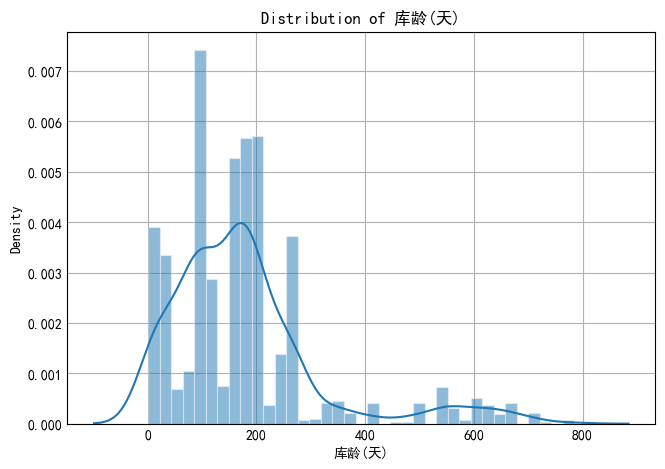

偏度为 1.745282 
峰度为 3.411981 


In [28]:
# Set the figure size
plt.figure(figsize=(6, 4))  # Adjust the width and height as desired

# Plot the distribution

sns.histplot(
    data_train['库龄(天)'], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.5, edgecolor=(1, 1, 1, .4),
)

# Add labels and title
plt.xlabel('库龄(天)')
plt.ylabel('Density')
plt.title('Distribution of 库龄(天)')

# Show the plot
plt.show()

print("偏度为 %f " % data_train['库龄(天)'].skew())
print("峰度为 %f " % data_train['库龄(天)'].kurt())

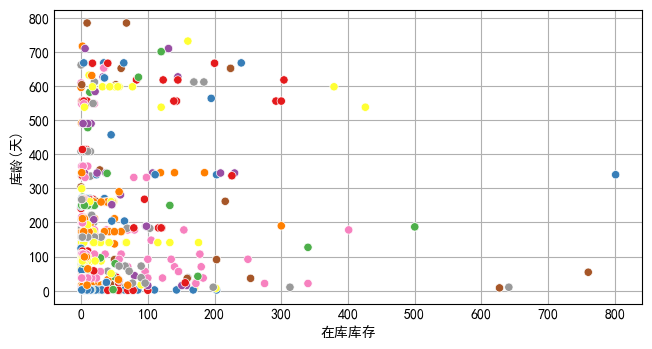

In [29]:
# 画 scatter plot - 在库库存 vs 库龄

df = data_train

# 创建一个 subplot 并设置其大小
fig, ax = plt.subplots(figsize=(6, 3))

# 使用 seaborn 绘制散点图
sns.scatterplot(y = '库龄(天)',
                x = '在库库存',
                hue = '库龄(天)',
                data = df,
                palette = "Set1",
                legend = False,
                ax = ax)

plt.show()

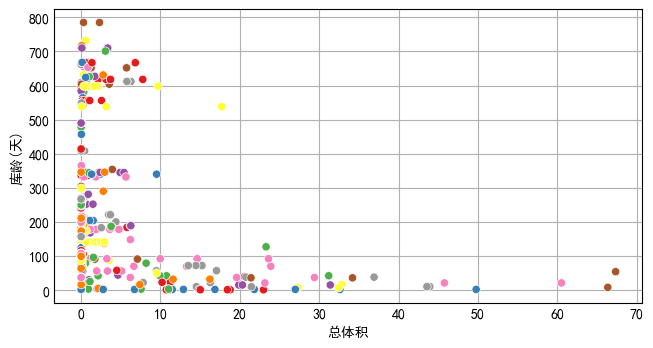

In [30]:
# 画 scatter plot - 总体积 vs 库龄
df = data_train

# 创建一个 subplot 并设置其大小
fig, ax = plt.subplots(figsize=(6, 3))

# 使用 seaborn 绘制散点图
sns.scatterplot(x = '总体积',
                y = '库龄(天)',
                hue = '库龄(天)',
                data = df,
                palette = "Set1",
                legend = False,
                ax = ax)

plt.show()

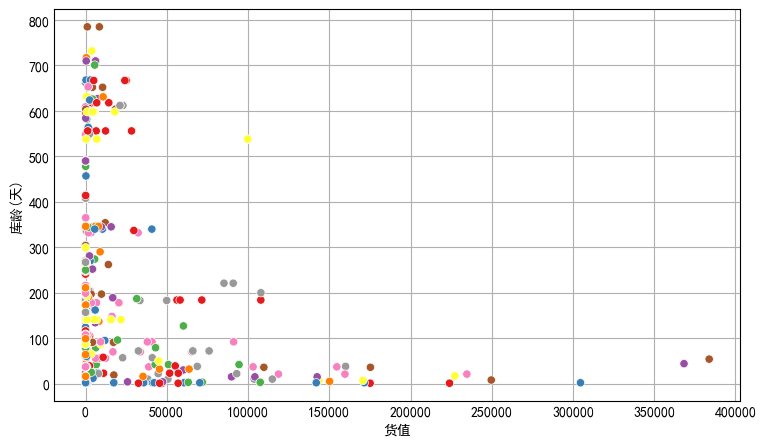

In [31]:
# 画 scatter plot - 货值 vs 库龄
df = data_train

# 创建一个 subplot 并设置其大小
fig, ax = plt.subplots(figsize=(7, 4))

# 使用 seaborn 绘制散点图
sns.scatterplot(y = '库龄(天)',
                x = '货值',
                hue = '库龄(天)',
                data = df,
                palette = "Set1",
                legend = False,
                ax = ax)

plt.show()

__相关性分析__

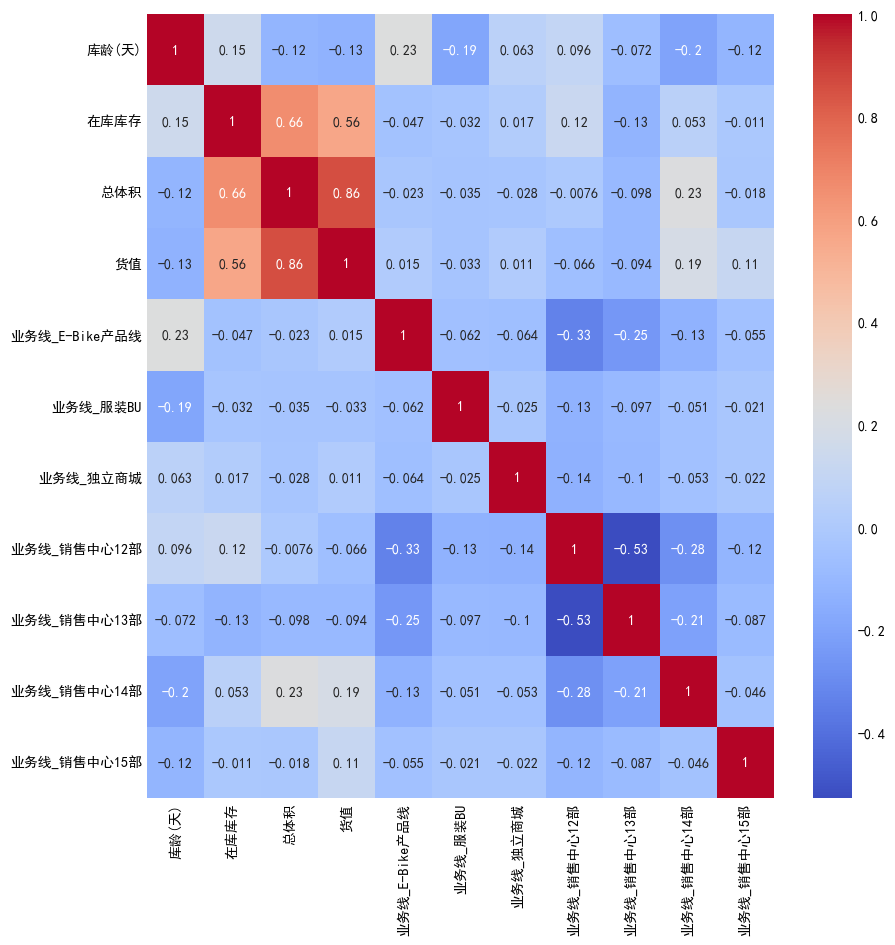

In [32]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

select_col = ['库龄(天)', '在库库存', '总体积', '货值', '业务线_E-Bike产品线', '业务线_服装BU', '业务线_独立商城',
       '业务线_销售中心12部', '业务线_销售中心13部', '业务线_销售中心14部', '业务线_销售中心15部']

fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the width and height as desired

sns.heatmap(data_train[select_col].corr(), cmap='coolwarm', annot=True, ax=ax)

plt.show()

从热力图中可以看出

在线库存和总体积（0.66）， 货值（0.56）成正相关

总体积和在库库存(0.66)，货值(0.86)成正相关

库龄与各个特征的相关性较弱



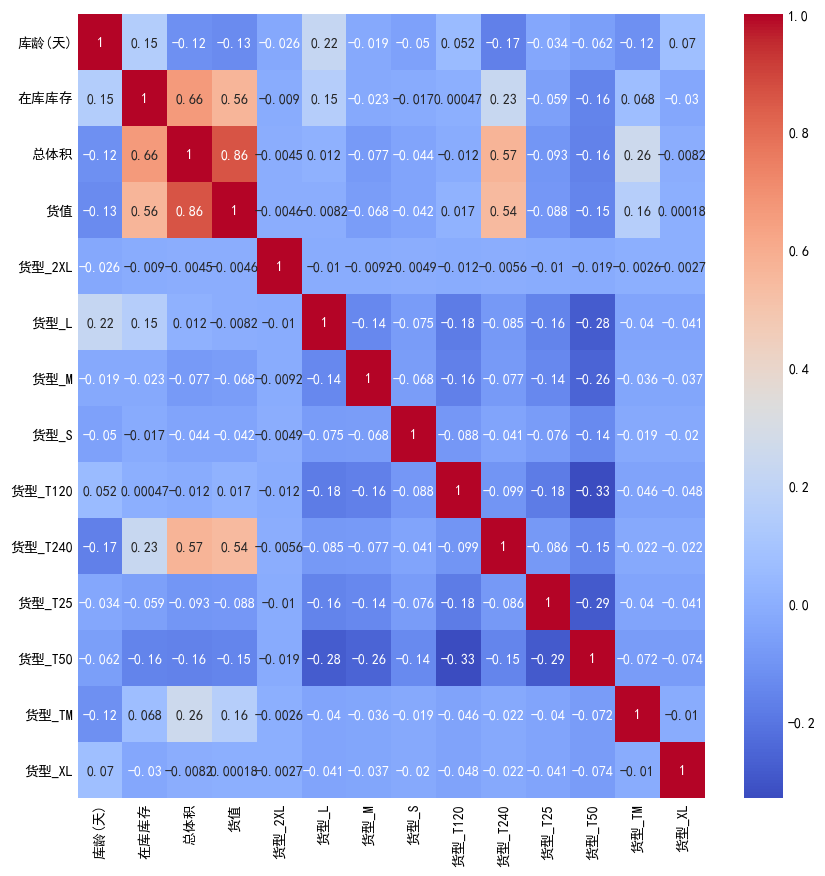

In [33]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

select_col = ['库龄(天)', '在库库存', '总体积', '货值', '货型_2XL',
       '货型_L', '货型_M', '货型_S', '货型_T120', '货型_T240', '货型_T25', '货型_T50',
       '货型_TM', '货型_XL']

fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the width and height as desired

sns.heatmap(data_train[select_col].corr(), cmap='coolwarm', annot=True, ax=ax)

plt.show()

总体积（0.57），货值（0.54）与货型_T240呈相对高的正相关性

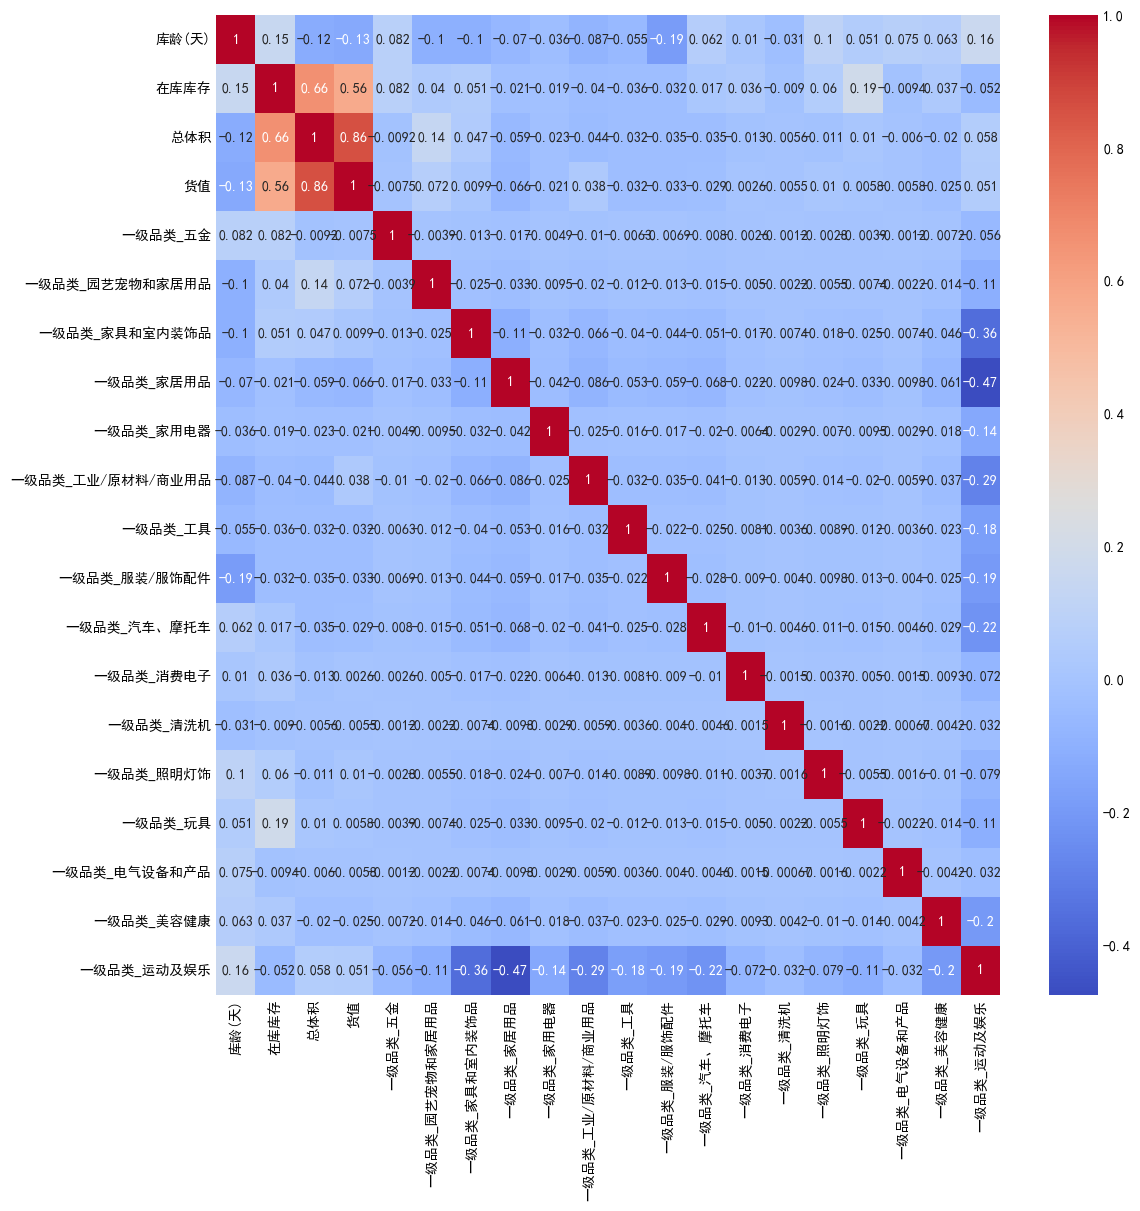

In [34]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

select_col = ['库龄(天)', '在库库存', '总体积', '货值',  '一级品类_五金', '一级品类_园艺宠物和家居用品', '一级品类_家具和室内装饰品',
       '一级品类_家居用品', '一级品类_家用电器', '一级品类_工业/原材料/商业用品', '一级品类_工具', '一级品类_服装/服饰配件',
       '一级品类_汽车、摩托车', '一级品类_消费电子', '一级品类_清洗机', '一级品类_照明灯饰', '一级品类_玩具',
       '一级品类_电气设备和产品', '一级品类_美容健康', '一级品类_运动及娱乐']

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the width and height as desired

sns.heatmap(data_train[select_col].corr(), cmap='coolwarm', annot=True, ax=ax)

plt.show()

__Feature engineering__

In [35]:
#拆分特征数据和标签数据
X = data_train.drop(columns = ['库龄(天)','在库库存'])
Y = data_train['库龄(天)']

__Find best parameters__

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Perform feature scaling if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [25, 50,75,100, 125, 150, 175, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(RandomForestRegressor(random_state=1, n_jobs=-1), param_grid, cv=5)
grid_search.fit(X_train_scaled, Y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
test_score = best_model.score(X_test_scaled, Y_test)
print("Test Score:", test_score)

# Print the best hyperparameters found during grid search
print("Best Hyperparameters:", grid_search.best_params_)


Test Score: 0.5714323130073135
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [37]:
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X, Y, test_size = 0.2, random_state = 1)

__机器建模 & 模型评估__

<font color = green>*XGB模型*<font/>

In [38]:

xgb_model = xgb.XGBRegressor(max_depth = 3,
                            learning_rate = 0.1,
                            n_estimators = 200,
                            objective = 'reg:squarederror',
                            booster = 'gbtree',
                            random_state = 0)

xgb_model.fit(X_train, Y_train)

xgb_y_pred = xgb_model.predict(X_validation)

# 模型评估
xgb_mse = mean_squared_error(Y_validation, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_score = xgb_model.score(X_validation, Y_validation)

print('XGB模型得分: ', xgb_score )
print('Mean Squared Error (MSE):', xgb_mse)
print('Root Mean Squared Error (RMSE):', xgb_rmse)

XGB模型得分:  0.5197882888506757
Mean Squared Error (MSE): 9740.948763052853
Root Mean Squared Error (RMSE): 98.69624492883634


<font color = green>*SVM模型*<font/>

In [39]:
# Split the data into train and test sets
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X, Y, test_size = 0.2, random_state = 1)

# Create and train the SVR model
svr = SVR(kernel='rbf')  # You can choose different kernel functions
svr.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = svr.predict(X_validation)

# Calculate evaluation metrics
mse = mean_squared_error(Y_validation, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_validation, y_pred)

# Print the evaluation metrics
print('SVM 模型 Score:', r2)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)


SVM 模型 Score: -0.025417297462309252
Mean Squared Error (MSE): 20800.27855093791
Root Mean Squared Error (RMSE): 144.22301671695095


<font color = green>*神经网络模型*<font/>

In [40]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data into train and test sets
X_train, X_validation, Y_train, Y_validation = train_test_split( X, Y, test_size = 0.2, random_state = 1)

# Create and train the MLPRegressor model
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_validation)

# Calculate evaluation metrics
mse = mean_squared_error(Y_validation, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_validation, y_pred)

# Print the evaluation metrics
print('R-squared (R2) Score:', r2)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)


R-squared (R2) Score: -2.025773050300288
Mean Squared Error (MSE): 61376.88766702358
Root Mean Squared Error (RMSE): 247.74359258520406


<font color = green>*随机森林模型*<font/>

In [41]:
forest = RandomForestRegressor(
    n_estimators = 131,
    random_state = 1,
    min_samples_split = 2,
    n_jobs = -1)

forest.fit(X_train, Y_train)

# Generate predictions on the validation set
y_validation_pred = forest.predict(X_validation)

# 模型评估
mse = mean_squared_error(Y_validation, y_validation_pred)
rmse = np.sqrt(mse)
score = forest.score(X_validation, Y_validation)

print('随机森林模型得分: ', score )
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

随机森林模型得分:  0.6198734720508727
Mean Squared Error (MSE): 7710.751208810535
Root Mean Squared Error (RMSE): 87.81088320254236


在4个机器学习的模型中，随机森林模型的表现相对来说最好。

随机森林模型得分: 0.6198
随机森林模型在验证集上获得了0.6198的得分。这意味着模型可以解释目标变量约61.98%的方差。较高的得分通常是可取的，表明模型的预测结果与实际值相对接近。然而，仍有改进的空间，因为得分低于1.0。

均方误差（MSE）: 7710.7512
均方误差衡量了模型预测值与实际值之间的平均平方差。在这种情况下，MSE为7710.7512。较低的MSE表示模型的预测结果与真实值的平均接近程度更高。MSE的数值大小取决于目标变量的尺度，但它可以用于比较不同模型或评估同一模型在不同数据集上的表现。

均方根误差（RMSE）: 87.8108
均方根误差是MSE的平方根，它提供了模型预测结果的平均绝对误差估计。在这种情况下，RMSE为87.8108，表示模型的预测结果与实际值之间的平均绝对差异。与MSE类似，较低的RMSE表示模型的性能更好。

总体而言，库龄与其他的自变量特征的相关性相对较弱。随机森林模型在验证集上获得了中等水平的准确性，得分为0.6198，表示模型可以解释约61.98%的目标变量方差。然而，仍有改进的空间，可以进一步提升模型性能。MSE和RMSE的数值提供了模型预测误差的信息，较低的数值表示模型性能更好。评估这些分数有助于评估模型的准确性并指导进一步的分析或潜在的模型改进。

__画图__

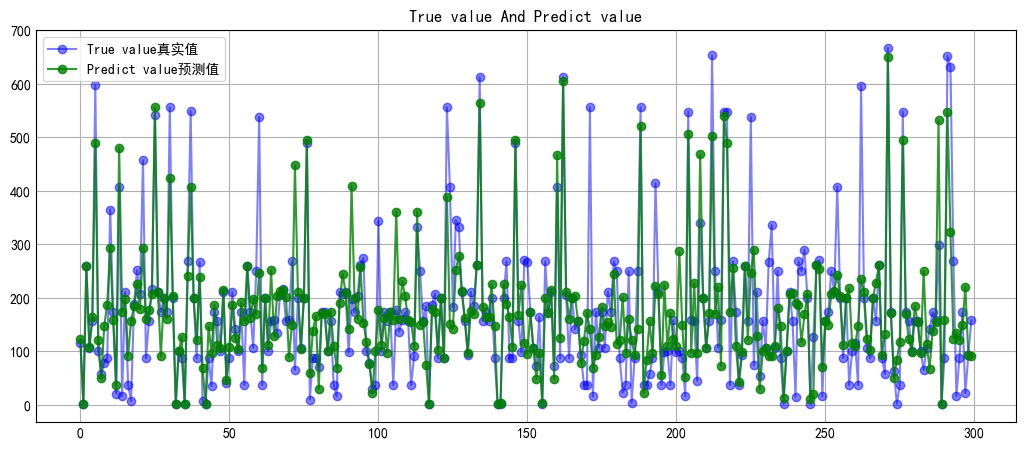

In [42]:
plt.figure(figsize=(10, 4))
plt.plot(np.arange(300), Y_validation[:300], "bo-", label="True value真实值 ", alpha = 0.5)
plt.plot(np.arange(300), y_validation_pred[:300], "go-", label="Predict value预测值", alpha = 0.8)
plt.title("True value And Predict value")
plt.legend();

__模型特征重要性__

 1) 货值                             27.79%
 2) 总体积                            24.16%
 3) 一级品类_运动及娱乐                     7.92%
 4) 业务线_E-Bike产品线                  6.83%
 5) 货型_M                           6.23%
 6) 货型_L                           4.81%
 7) 业务线_销售中心12部                    4.35%
 8) 货型_T120                        3.74%
 9) 业务线_销售中心13部                    1.72%
10) 货型_T240                        1.55%
11) 一级品类_家居用品                      1.22%
12) 一级品类_服装/服饰配件                   1.13%
13) 业务线_销售中心14部                    1.11%
14) 一级品类_玩具                        1.08%
15) 业务线_服装BU                       1.08%
16) 一级品类_汽车、摩托车                    0.98%
17) 货型_T50                         0.89%
18) 一级品类_工业/原材料/商业用品               0.50%
19) 货型_T25                         0.46%
20) 一级品类_照明灯饰                      0.37%
21) 业务线_销售中心15部                    0.34%
22) 货型_S                           0.33%
23) 一级品类_家具和室内装饰品                  0.27%
24) 业务线_独立商城                       0.25%
25) 货型_XL     

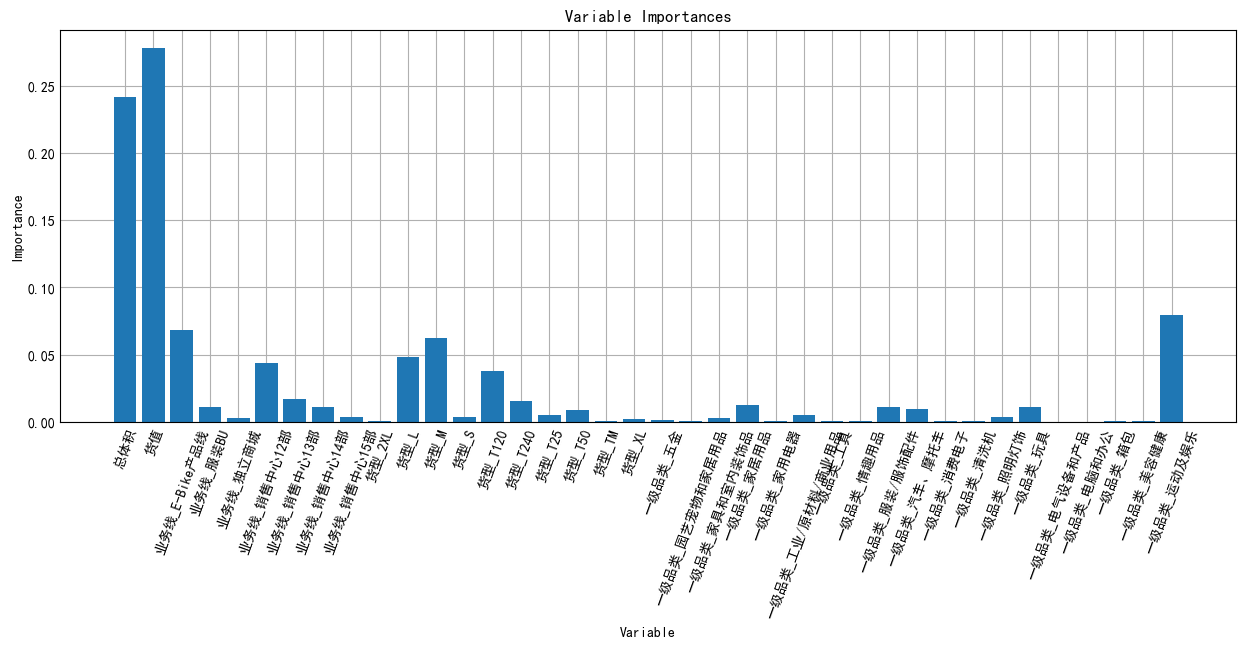

In [43]:
col = list(X_train.columns.values)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
list01 = []
list02 = []

for f in range(X_train.shape[1]):
    importance_percentage = importances[indices[f]] * 100  # Convert importance to percentage
    print("%2d) %-*s %.2f%%" % (f + 1, 30, col[indices[f]], importance_percentage))
    list01.append(col[indices[f]])
    list02.append(importance_percentage)

from pandas.core.frame import DataFrame

importances = list(forest.feature_importances_)
feature_list = list(X_train.columns)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

x_values = list(range(len(importances)))

plt.figure(figsize=(12, 4))
plt.bar(x_values, importances, orientation='vertical')
plt.xticks(x_values, feature_list, rotation=70)
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
plt.show()


在所有的自变量特征中，‘总体积’，‘货值’在模型当中占有比较大的重要性。

### 模型应用 

In [44]:
df_test = data_test.drop(columns = '库龄(天)')

In [45]:
# 哑变量处理
col_list = ['总体积','货值', '业务线', '货型','一级品类']
df = df_test[col_list]

In [46]:
# 使用pandas自带的fucntion （get_dummies）来进行独热编码
df_test = pd.get_dummies(df[col_list], prefix_sep="_", columns=df.columns[2:])

In [47]:
# 找出df_test缺失的column
data_train_list = list(data_train.columns)
df_test_list = list(df_test.columns)

set1 = set(data_train_list)
set2 = set(df_test_list)

diff_values = set1.symmetric_difference(set2)

diff_values_list = list(diff_values)

elements_to_drop = ['库龄(天)', '在库库存']
filtered_list = [item for item in diff_values_list if item not in elements_to_drop]
print(filtered_list)  

['一级品类_箱包', '货型_TM', '一级品类_清洗机', '一级品类_玩具', '一级品类_五金', '一级品类_电气设备和产品', '一级品类_照明灯饰', '一级品类_电脑和办公']


In [48]:
for column in filtered_list:
    df_test[column] = 0
    
data_train = data_train.drop(columns = ['在库库存', '库龄(天)'])
col_order = list(data_train.columns)
df_test = df_test[col_order]

In [49]:
y_test_pred = forest.predict(df_test)
df_test.loc[:, '预测库龄'] = y_test_pred
df_test

,总体积,货值,业务线_E-Bike产品线,业务线_服装BU,业务线_独立商城,业务线_销售中心12部,业务线_销售中心13部,业务线_销售中心14部,业务线_销售中心15部,货型_2XL,...,一级品类_消费电子,一级品类_清洗机,一级品类_照明灯饰,一级品类_玩具,一级品类_电气设备和产品,一级品类_电脑和办公,一级品类_箱包,一级品类_美容健康,一级品类_运动及娱乐,预测库龄
1527,0.026812,42.8040,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,127.832061
1019,0.006000,9.2322,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,185.963104
1563,0.032712,27.8313,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130.723919
959,0.001248,21.0476,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,199.091603
1761,0.008800,65.9938,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,264.358779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.006840,8.5940,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,200.145038
1294,0.065664,0.0000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,179.977099
860,0.033600,88.6425,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,92.900763
1459,0.000096,30.0783,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,153.469466


## 单独分析分类型特征 

### 设计画图的fucntion 

<font color = green>*圆环图*<font/>

In [51]:
# 画圆环图，之后分类型特征都可以画

def plot_circle(df, col):
    
    # df：需要画图的数据表
    # col：作为图例的列

    库龄段 = list(df['库龄段'].unique()) 
    lable_num = len(df[col].unique())

    for i in range(len(库龄段)):
        df_1 = df[df['库龄段'] == 库龄段[i]]

        color  = np.random.rand(lable_num, 3)

        # 绘制圆环图
        fig1, ax1 = plt.subplots(figsize=(3, 3))

        ax1.pie(df_1['数量'],  labels = df_1['数量'], colors = color, autopct='%1.1f%%', startangle=90)
        ax1.axis('equal')  # 设置饼图为正圆形

        # 添加中心空白，并设置属性
        circle = plt.Circle((0, 0), 0.4, fc='white')
        fig = plt.gcf()  # 获取当前图表对象
        fig.gca().add_artist(circle)

        # 添加标题
        ax1.text(0, 0, 库龄段[i], horizontalalignment='center', verticalalignment='center', fontsize=12, weight='bold')
        
        # 添加图例
        plt.legend(df_1[col], loc='best', bbox_to_anchor=(1.2, 0.8))

        # 显示图形
        plt.show()


<font color = green>*热力图*<font/>

In [52]:
def plot_heatmap(df, col_1, col_2, col_3):
    
    # df : 数据表
    # col_1 : 用作index的列
    # col_2 : x轴
    # col_3 : 热力表需要体现的数量
    

    fig = plt.figure(figsize=(7, 4))

    # 使用交叉表(crosstab)生成数据透视表
    pivot_table = pd.crosstab(index = df[col_1], columns = df[col_2], values = df[col_3], aggfunc = 'sum')

    # 使用热力图(heatmap)可视化数据
    plt.imshow(pivot_table, cmap='YlOrRd')
    plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation = 50)
    plt.yticks(range(len(pivot_table.index)), pivot_table.index)

    plt.colorbar()
    plt.show()


<font color = green>*柱状图*<font/>

In [53]:
def plot_bar(df,col_1, col_2, col_3):
    

    # 对数变换
    df['log(数量)'] = np.log1p(df[col_3])

    # 创建条形图
    lable_num = len(df[col_2].unique()) + 1
    color1 = np.random.rand(lable_num,3)

    pivot_table = df.pivot_table(index = col_1, columns = col_2, values = 'log(数量)', aggfunc='sum')
    pivot_table.plot(kind='bar',figsize=(10, 4), color = color1)
    plt.xlabel(col_2)
    plt.ylabel(col_3)
    plt.legend( loc='lower left', bbox_to_anchor=(1.05, 0))

    # 显示图形
    plt.show()


## 分类型特征 

### 一级品类 -  库龄 （分类型特征） 

In [54]:
# 筛选提取每个库龄段，不同货型以及其所对应的数量
df_品类 = df_三方仓明细汇总.groupby(by = ['库龄段','一级品类']).count().iloc[:,0:1].reset_index()
df_品类 = df_品类.rename(columns = {"SKU编码":"数量"})

In [55]:
df = df_品类
# Define the desired order of categories
order = ['0-30天', '31-60天', '61-90天', '91-120天', '121-180天', '181-270天', '271-360天', '360天以上']

# Convert the '库龄段' column to the Categorical data type with the desired order
df['库龄段'] = pd.Categorical(df['库龄段'], categories=order, ordered=True)

# Sort the DataFrame by the '库龄段' column
df_sorted = df.sort_values('库龄段')

df_品类 = df_sorted


In [56]:
df_品类.head(5)

,库龄段,一级品类,数量
0,0-30天,园艺宠物和家居用品,12
8,0-30天,清洗机,1
7,0-30天,汽车、摩托车,5
6,0-30天,服装/服饰配件,43
5,0-30天,工具,1


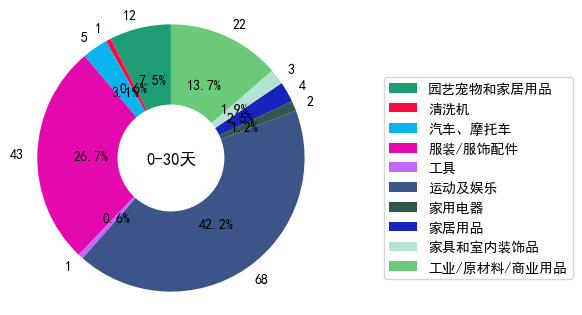

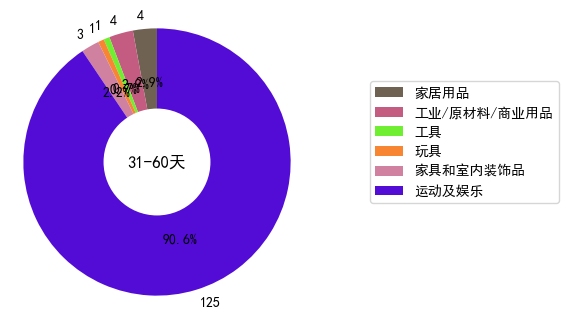

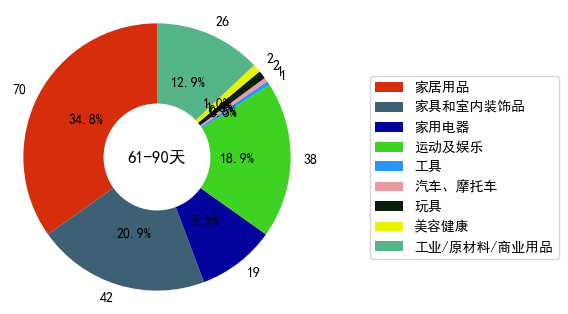

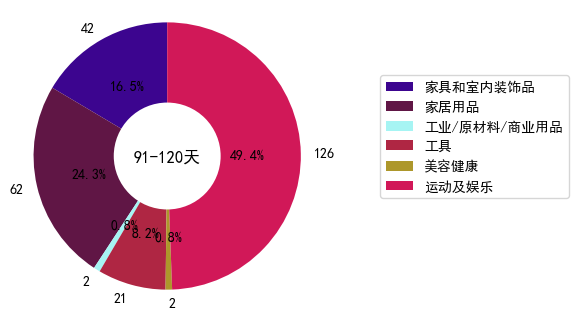

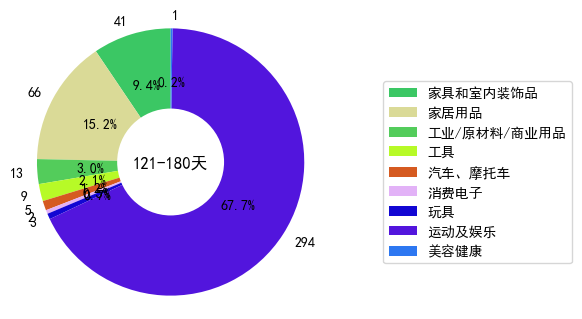

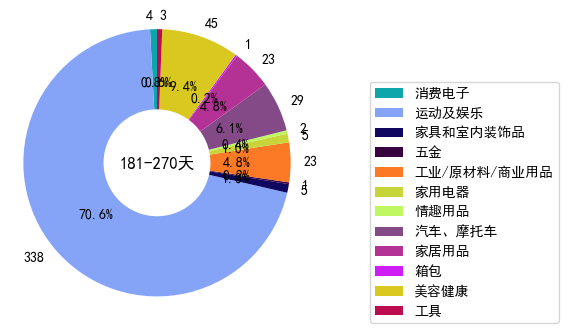

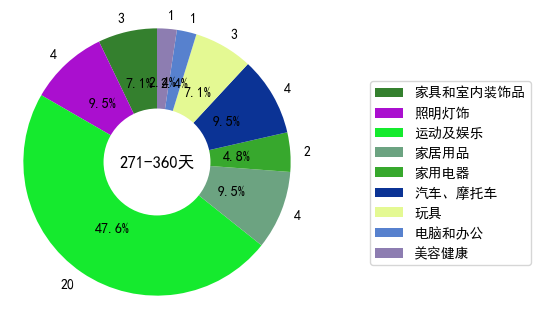

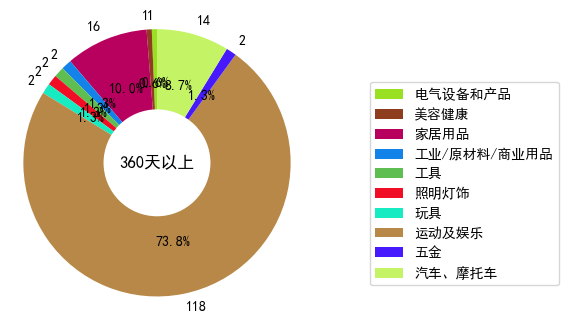

In [57]:
plot_circle(df_品类, '一级品类')

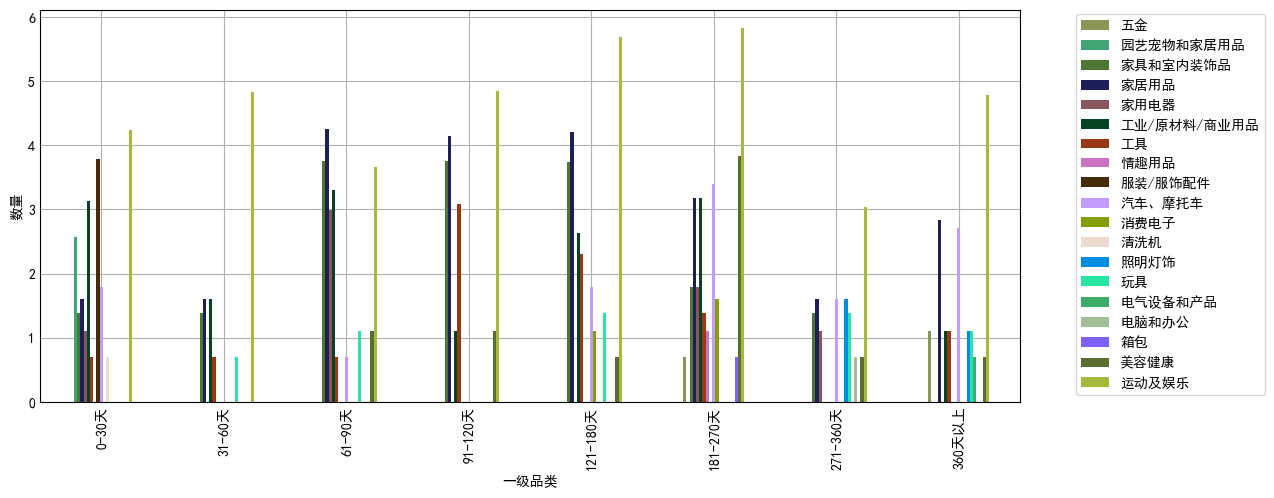

In [58]:
plot_bar(df_品类,'库龄段', '一级品类', '数量')

可以看出 0-30天库龄段障占比最多的是‘运动及娱乐’的产品，库存占比达42.2%， 数量为68

接着31-60天库龄段的‘运动及娱乐’的产品，库存占比高达90.6%， 数量为125

360天以上库龄段占比最多的也是‘运动及娱乐’的产品，库存占比为73.8%， 但是数量高达118

‘运动及娱乐’类的产品库存在库龄段“181-270”天达到了巅峰，数量为338

说明‘运动及娱乐’类的产品库存量大，并且有一定程度的滞销，库存累积的情况

### 货型 - 库龄 （分类型特征）

In [59]:
# 筛选提取每个库龄段，不同货型以及其所对应的数量
df_货型 = df_三方仓明细汇总.groupby(by = ['库龄段','货型']).count().iloc[:,0:1].reset_index()


In [60]:
df_货型 = df_货型.rename(columns = {"SKU编码":"数量"})

In [61]:
df = df_货型
# Define the desired order of categories
order = ['0-30天', '31-60天', '61-90天', '91-120天', '121-180天', '181-270天', '271-360天', '360天以上']

# Convert the '库龄段' column to the Categorical data type with the desired order
df['库龄段'] = pd.Categorical(df['库龄段'], categories=order, ordered=True)

# Sort the DataFrame by the '库龄段' column
df_sorted = df.sort_values('库龄段')

df_货型 = df_sorted

In [62]:
#df_货型['数量'].sum(0)

# 注意，原数据里有很多空值，所以记录了货型的数据点只有原数据表数据点的一般

In [63]:
# ***** 想办法把库龄段按照顺序排列 ***** 

df_货型.head(10)


,库龄段,货型,数量
0,0-30天,L,15
1,0-30天,M,44
2,0-30天,T120,25
3,0-30天,T240,35
4,0-30天,T25,5
5,0-30天,T50,27
6,0-30天,TM,12
29,31-60天,T120,24
30,31-60天,T240,19
31,31-60天,T25,20


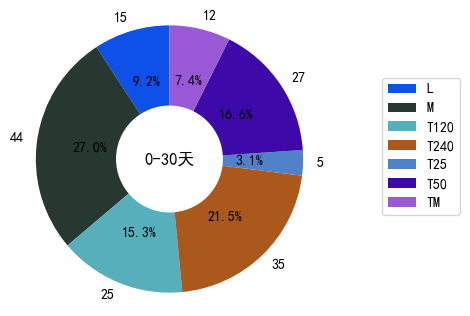

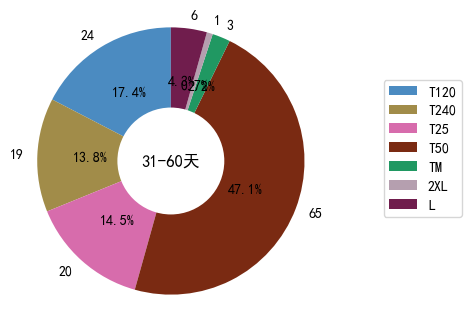

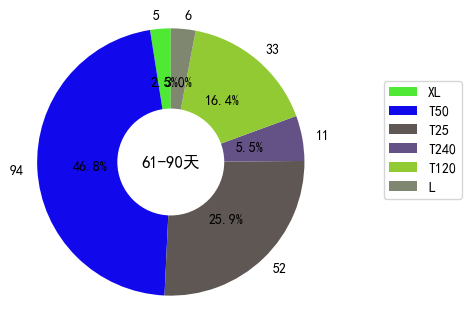

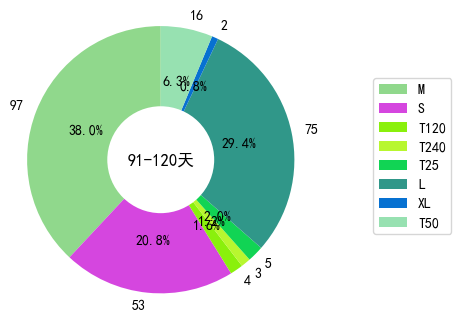

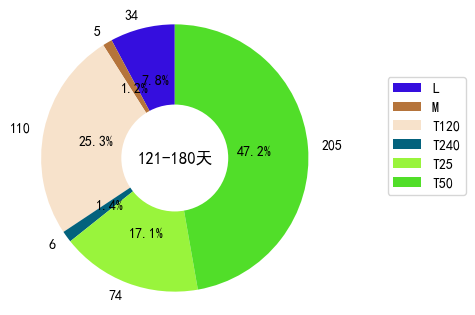

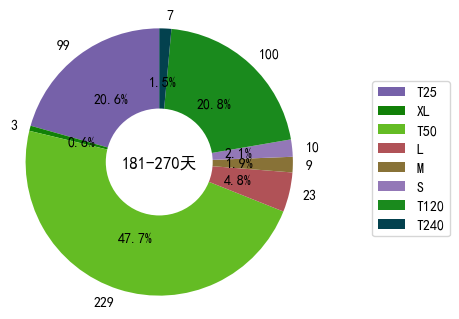

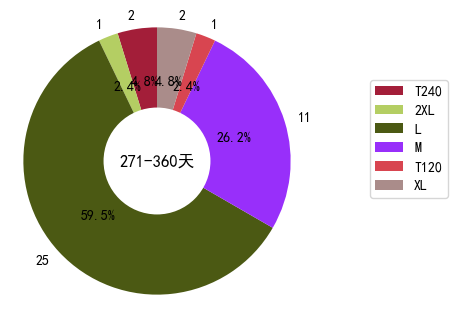

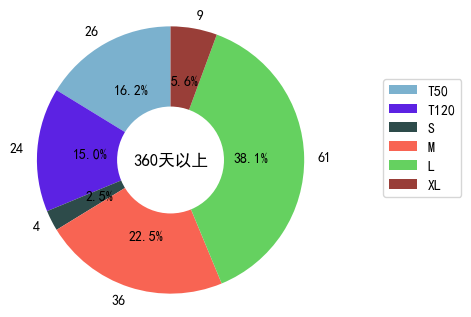

In [64]:
plot_circle(df_货型, '货型')

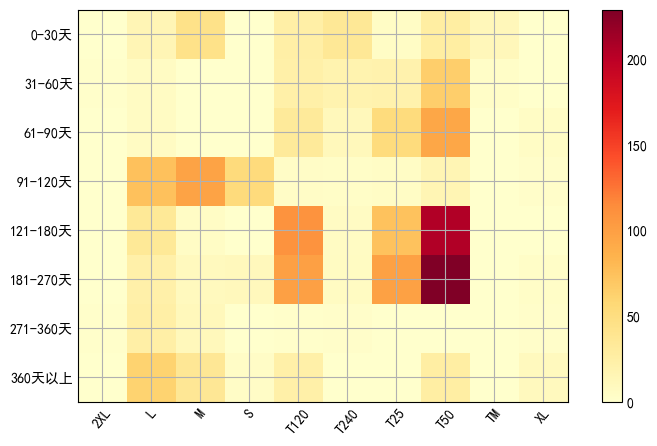

In [65]:
plot_heatmap(df_货型, '库龄段', '货型', '数量')

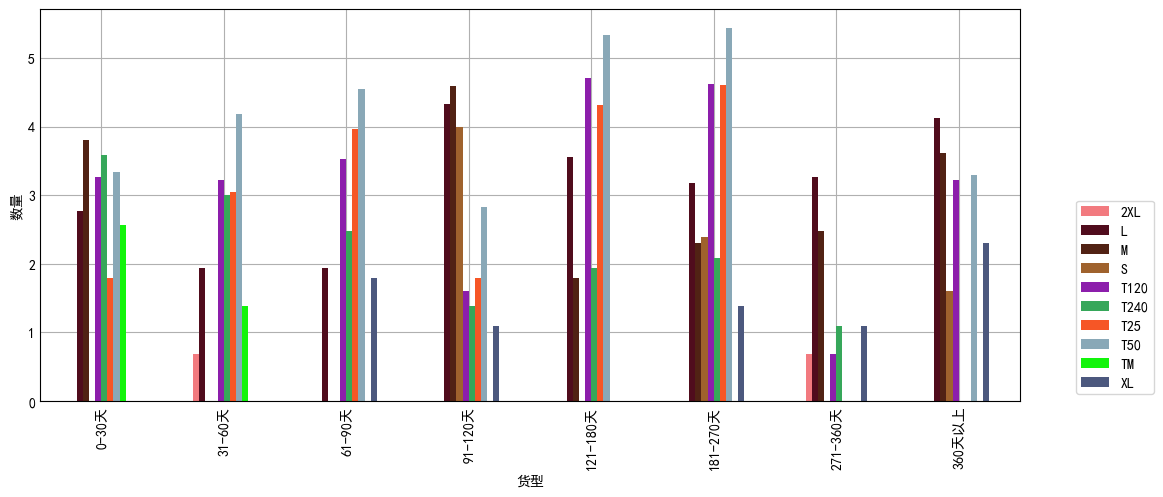

In [66]:
plot_bar(df_货型,'库龄段', '货型', '数量')

### 业务线 - 库龄 （分类型特征） 

In [67]:
df_业务线 = df_三方仓明细汇总.groupby(by = ['库龄段','业务线']).count().iloc[:,0:1].reset_index()
df_业务线 = df_业务线.rename(columns = {"SKU编码":"数量"})

In [68]:
df = df_业务线
# Define the desired order of categories
order = ['0-30天', '31-60天', '61-90天', '91-120天', '121-180天', '181-270天', '271-360天', '360天以上']

# Convert the '库龄段' column to the Categorical data type with the desired order
df['库龄段'] = pd.Categorical(df['库龄段'], categories=order, ordered=True)

# Sort the DataFrame by the '库龄段' column
df_sorted = df.sort_values('库龄段')

df_业务线 = df_sorted

In [69]:
df_业务线.head(5)

,库龄段,业务线,数量
0,0-30天,E-Bike产品线,13
1,0-30天,服装BU,43
2,0-30天,销售中心12部,58
3,0-30天,销售中心13部,11
4,0-30天,销售中心14部,21


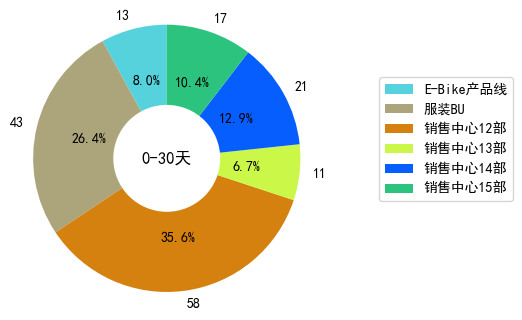

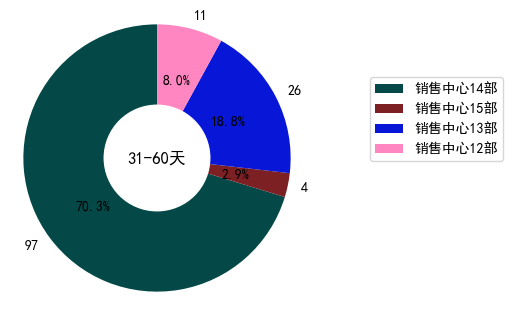

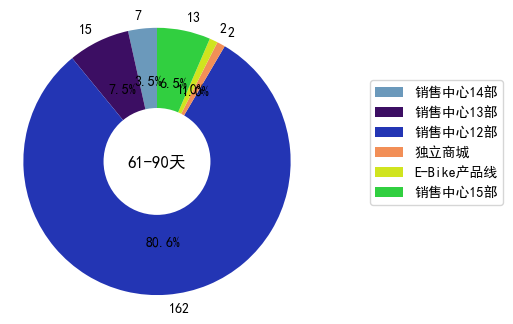

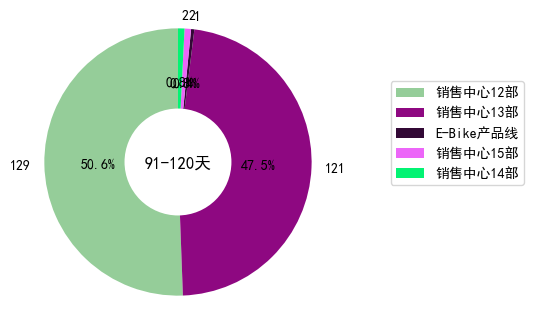

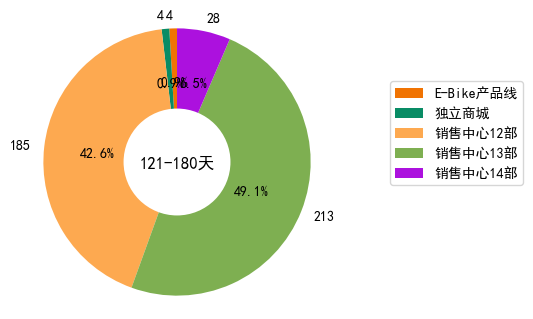

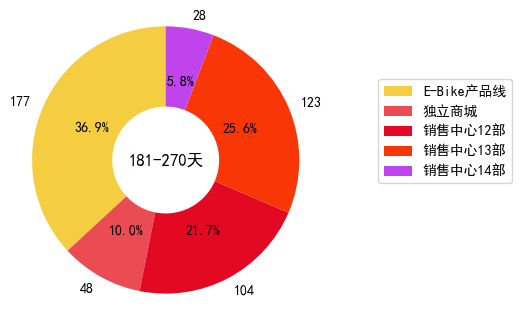

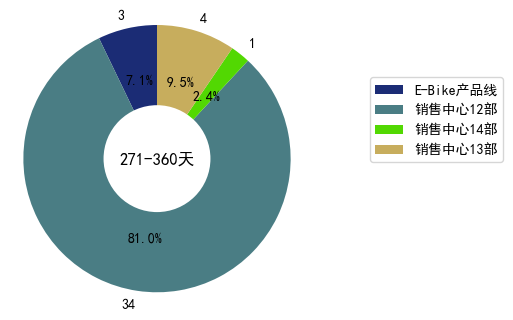

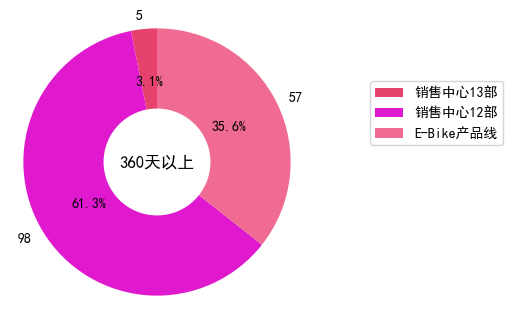

In [70]:
plot_circle(df_业务线, '业务线')


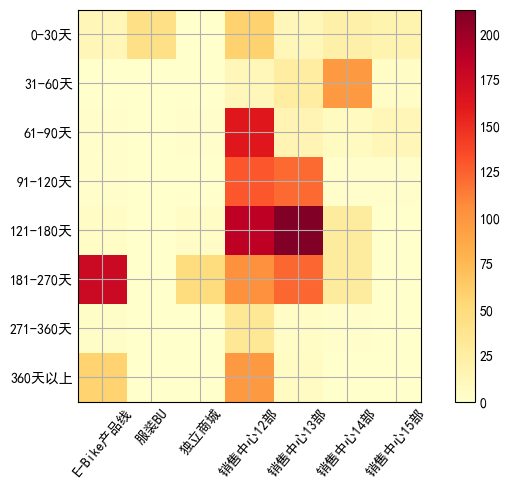

In [71]:
plot_heatmap(df_业务线, '库龄段', '业务线', '数量')

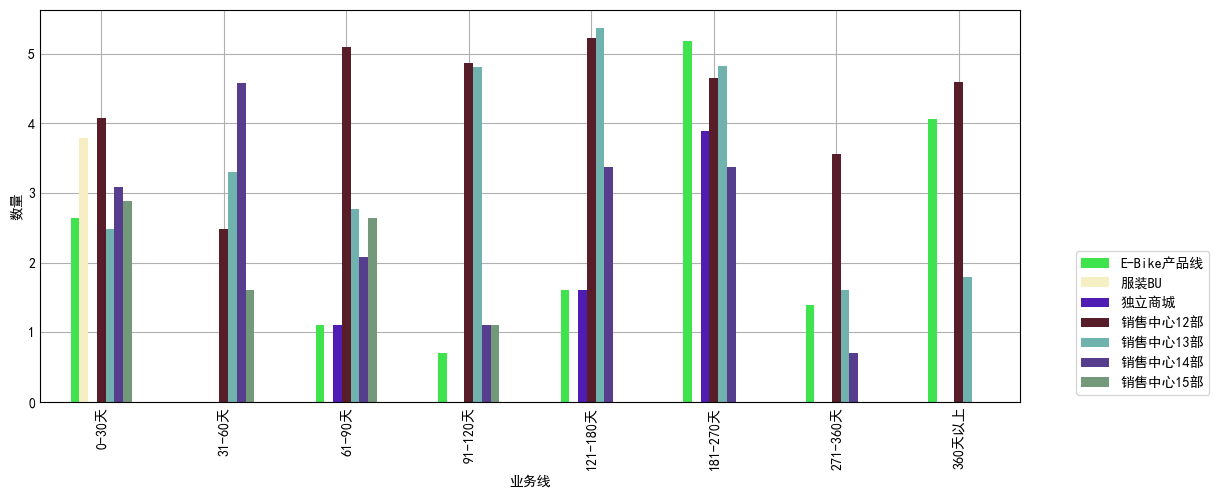

In [72]:
plot_bar(df_业务线,'库龄段', '业务线', '数量')

### 仓库 - 库龄 （分类型特征）

In [73]:
df_仓库 = df_三方仓明细汇总.groupby(by = ['库龄段','仓库']).count().iloc[:,0:1].reset_index()
df_仓库 = df_仓库.rename(columns = {"SKU编码":"数量"})

In [74]:
df = df_仓库
# Define the desired order of categories
order = ['0-30天', '31-60天', '61-90天', '91-120天', '121-180天', '181-270天', '271-360天', '360天以上']

# Convert the '库龄段' column to the Categorical data type with the desired order
df['库龄段'] = pd.Categorical(df['库龄段'], categories=order, ordered=True)

# Sort the DataFrame by the '库龄段' column
df_sorted = df.sort_values('库龄段')

df_仓库 = df_sorted

In [75]:
df_仓库.head(5)

,库龄段,仓库,数量
0,0-30天,4PX加拿大仓,8
1,0-30天,4PX捷克仓,49
2,0-30天,51英国仓,59
3,0-30天,易达云美国仓,29
4,0-30天,西邮美国仓,18


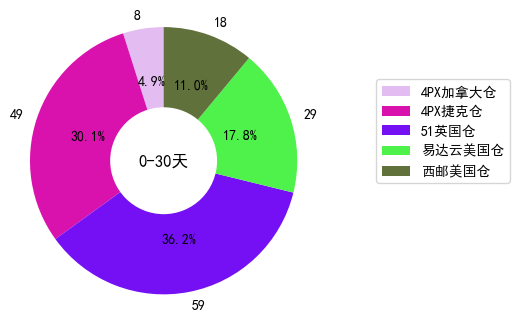

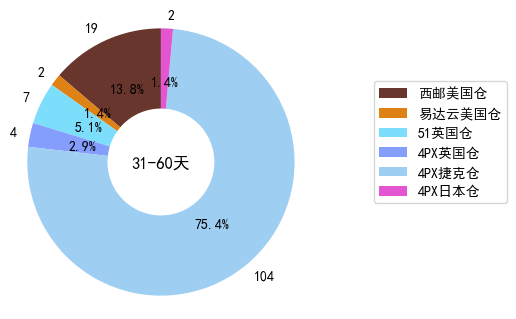

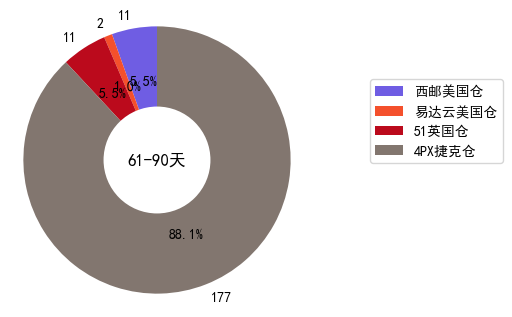

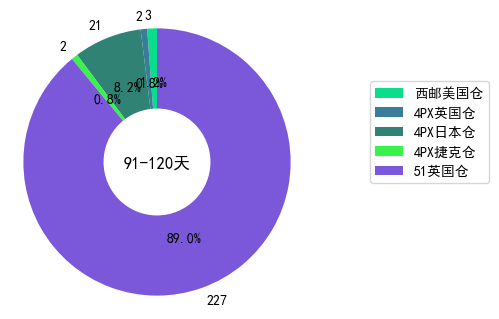

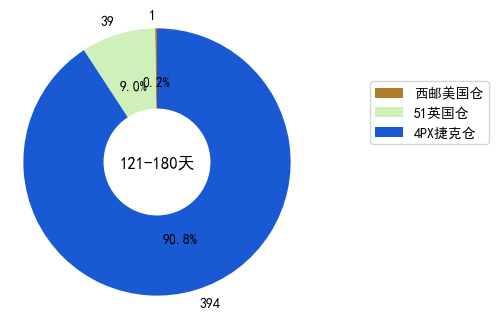

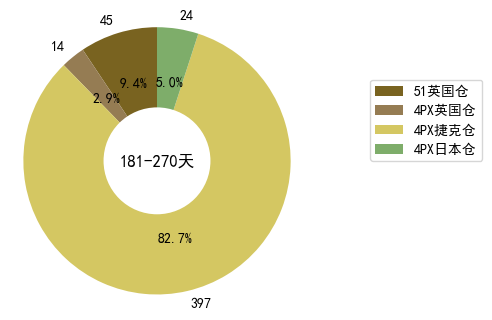

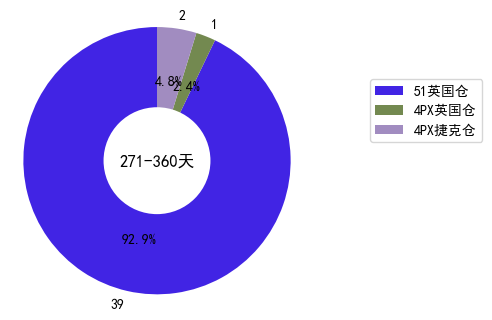

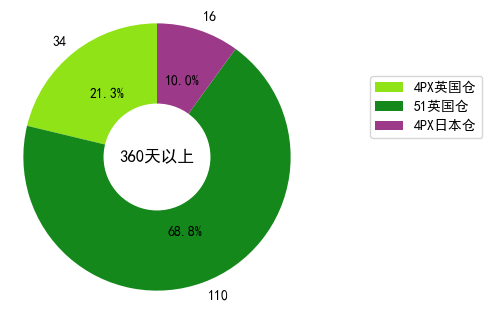

In [76]:
plot_circle(df_仓库, '仓库')

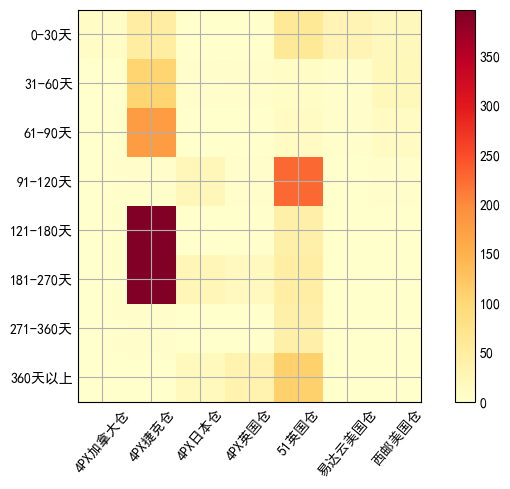

In [77]:
plot_heatmap(df_仓库, '库龄段', '仓库', '数量')

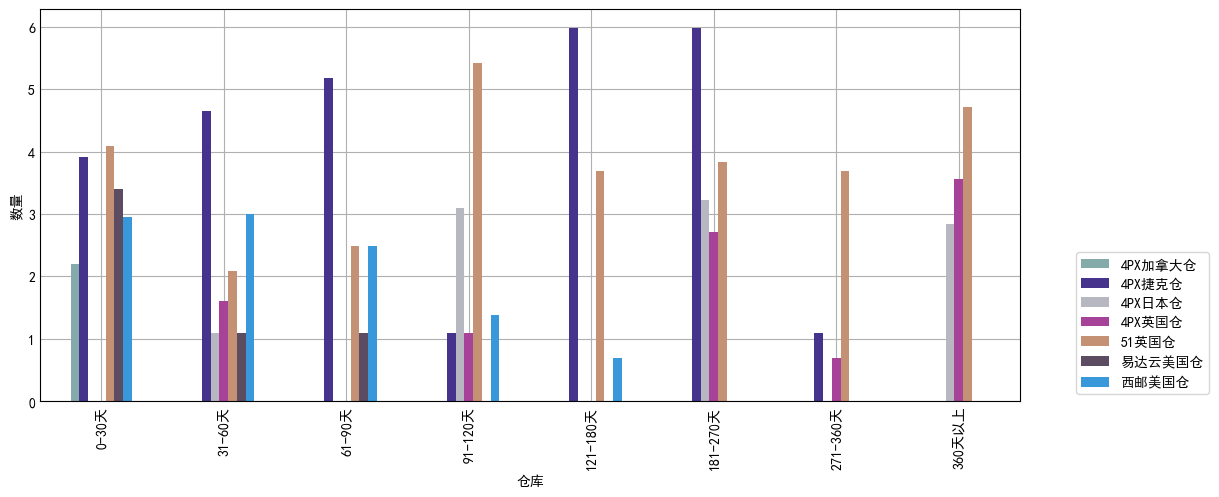

In [78]:
plot_bar(df_仓库,'库龄段', '仓库', '数量')